#Case Suzano - Cientista de dados
Candidato: Lucas Alexandre


##Importando as bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split, GridSearchCV
from sklearn.preprocessing import scale

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score

from google.colab import files

##Funções

In [ ]:
def rul(df):  #Cria a variável target
  max_run = df.groupby(by='Asset_id')['runtime'].max().reset_index()
  df_merge = df.merge(max_run, how='left', on='Asset_id', suffixes=('', '_max'))
  df_merge['rul'] = df_merge['runtime_max'] - df_merge['runtime']
  df_merge = df_merge.drop(columns=['runtime_max'])
  return df_merge

In [ ]:
sns.set_theme(
    context='talk', style='ticks', font_scale=0.8,
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.labelpad': 15,
    }
)

##Importando os dados

In [ ]:
files.upload()

{}

In [ ]:
df_train = pd.read_csv('PM_train.txt')
df_train

,Asset_id,runtime,Setting1,Setting2,Setting3,Tag1,Tag2,Tag3,Tag4,Tag5,...,Tag14,Tag15,Tag16,Tag17,Tag18,Tag19,Tag20,Tag21,rm1,rm2
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


In [ ]:
df_test = pd.read_csv('PM_test.txt')
df_test

,Asset_id,runtime,Setting1,Setting2,Setting3,Tag1,Tag2,Tag3,Tag4,Tag5,...,Tag14,Tag15,Tag16,Tag17,Tag18,Tag19,Tag20,Tag21,rm1,rm2
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,NaN,NaN
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,NaN,NaN
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,NaN,NaN
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,NaN,NaN


##Data cleaning

###Duplicados

In [ ]:
df_train.duplicated().sum()

0

In [ ]:
df_test.duplicated().sum()

0

###Nulos

In [ ]:
df_train.isnull().sum()

Asset_id        0
runtime         0
Setting1        0
Setting2        0
Setting3        0
Tag1            0
Tag2            0
Tag3            0
Tag4            0
Tag5            0
Tag6            0
Tag7            0
Tag8            0
Tag9            0
Tag10           0
Tag11           0
Tag12           0
Tag13           0
Tag14           0
Tag15           0
Tag16           0
Tag17           0
Tag18           0
Tag19           0
Tag20           0
Tag21           0
rm1         20631
rm2         20631
dtype: int64

In [ ]:
df_test.isnull().sum()

Asset_id        0
runtime         0
Setting1        0
Setting2        0
Setting3        0
Tag1            0
Tag2            0
Tag3            0
Tag4            0
Tag5            0
Tag6            0
Tag7            0
Tag8            0
Tag9            0
Tag10           0
Tag11           0
Tag12           0
Tag13           0
Tag14           0
Tag15           0
Tag16           0
Tag17           0
Tag18           0
Tag19           0
Tag20           0
Tag21           0
rm1         13096
rm2         13096
dtype: int64

As duas últimas colunas possuem apenas valores nulos, logo, foram removidas.

In [ ]:
df_train = df_train.drop(columns=['rm1', 'rm2'])
df_test = df_test.drop(columns=['rm1', 'rm2'])

###Tipos de dados

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Asset_id  20631 non-null  int64  
 1   runtime   20631 non-null  int64  
 2   Setting1  20631 non-null  float64
 3   Setting2  20631 non-null  float64
 4   Setting3  20631 non-null  float64
 5   Tag1      20631 non-null  float64
 6   Tag2      20631 non-null  float64
 7   Tag3      20631 non-null  float64
 8   Tag4      20631 non-null  float64
 9   Tag5      20631 non-null  float64
 10  Tag6      20631 non-null  float64
 11  Tag7      20631 non-null  float64
 12  Tag8      20631 non-null  float64
 13  Tag9      20631 non-null  float64
 14  Tag10     20631 non-null  float64
 15  Tag11     20631 non-null  float64
 16  Tag12     20631 non-null  float64
 17  Tag13     20631 non-null  float64
 18  Tag14     20631 non-null  float64
 19  Tag15     20631 non-null  float64
 20  Tag16     20631 non-null  fl

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Asset_id  13096 non-null  int64  
 1   runtime   13096 non-null  int64  
 2   Setting1  13096 non-null  float64
 3   Setting2  13096 non-null  float64
 4   Setting3  13096 non-null  float64
 5   Tag1      13096 non-null  float64
 6   Tag2      13096 non-null  float64
 7   Tag3      13096 non-null  float64
 8   Tag4      13096 non-null  float64
 9   Tag5      13096 non-null  float64
 10  Tag6      13096 non-null  float64
 11  Tag7      13096 non-null  float64
 12  Tag8      13096 non-null  float64
 13  Tag9      13096 non-null  float64
 14  Tag10     13096 non-null  float64
 15  Tag11     13096 non-null  float64
 16  Tag12     13096 non-null  float64
 17  Tag13     13096 non-null  float64
 18  Tag14     13096 non-null  float64
 19  Tag15     13096 non-null  float64
 20  Tag16     13096 non-null  fl

Todas as colunas estão em formatos numéricos, dispensando conversões.

##Criando a coluna target
RUL = remaining useful life

In [ ]:
df_train.head()

,Asset_id,runtime,Setting1,Setting2,Setting3,Tag1,Tag2,Tag3,Tag4,Tag5,...,Tag12,Tag13,Tag14,Tag15,Tag16,Tag17,Tag18,Tag19,Tag20,Tag21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [ ]:
df_train = rul(df_train)
df_train.head(3)

,Asset_id,runtime,Setting1,Setting2,Setting3,Tag1,Tag2,Tag3,Tag4,Tag5,...,Tag13,Tag14,Tag15,Tag16,Tag17,Tag18,Tag19,Tag20,Tag21,rul
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189


In [ ]:
df_test = rul(df_test)
df_test.head(3)

,Asset_id,runtime,Setting1,Setting2,Setting3,Tag1,Tag2,Tag3,Tag4,Tag5,...,Tag13,Tag14,Tag15,Tag16,Tag17,Tag18,Tag19,Tag20,Tag21,rul
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,30
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,29
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,28


##EDA

###Estatística descritiva

In [ ]:
df_train.describe()

,Asset_id,runtime,Setting1,Setting2,Setting3,Tag1,Tag2,Tag3,Tag4,Tag5,...,Tag13,Tag14,Tag15,Tag16,Tag17,Tag18,Tag19,Tag20,Tag21,rul
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,107.807862
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251,68.880990
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,0.000000
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,51.000000
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,103.000000
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,155.000000
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,361.000000


In [ ]:
df_test.describe()

,Asset_id,runtime,Setting1,Setting2,Setting3,Tag1,Tag2,Tag3,Tag4,Tag5,...,Tag13,Tag14,Tag15,Tag16,Tag17,Tag18,Tag19,Tag20,Tag21,rul
count,13096.000000,13096.000000,13096.000000,13096.000000,13096.0,13096.00,13096.000000,13096.000000,13096.000000,1.309600e+04,...,13096.000000,13096.000000,13096.000000,1.309600e+04,13096.000000,13096.0,13096.0,13096.000000,13096.000000,13096.000000
mean,51.543907,76.836515,-0.000011,0.000004,100.0,518.67,642.475088,1588.099204,1404.735362,1.462000e+01,...,2388.071025,8138.947817,8.425844,3.000000e-02,392.571625,2388.0,100.0,38.892502,23.335743,75.836515
std,28.289423,53.057749,0.002203,0.000294,0.0,0.00,0.400899,5.003274,6.688309,1.776425e-15,...,0.056934,10.188605,0.029009,1.040874e-17,1.233577,0.0,0.0,0.141681,0.084120,53.057749
min,1.000000,1.000000,-0.008200,-0.000600,100.0,518.67,641.130000,1569.040000,1384.390000,1.462000e+01,...,2387.890000,8108.500000,8.332800,3.000000e-02,389.000000,2388.0,100.0,38.310000,22.935400,0.000000
25%,28.000000,33.000000,-0.001500,-0.000200,100.0,518.67,642.197500,1584.600000,1399.950000,1.462000e+01,...,2388.030000,8132.310000,8.405600,3.000000e-02,392.000000,2388.0,100.0,38.800000,23.281600,32.000000
50%,52.000000,69.000000,0.000000,0.000000,100.0,518.67,642.460000,1587.990000,1404.440000,1.462000e+01,...,2388.070000,8138.390000,8.424900,3.000000e-02,393.000000,2388.0,100.0,38.900000,23.339200,68.000000
75%,76.000000,113.000000,0.001500,0.000300,100.0,518.67,642.740000,1591.362500,1409.050000,1.462000e+01,...,2388.110000,8144.360000,8.444300,3.000000e-02,393.000000,2388.0,100.0,38.990000,23.393600,112.000000
max,100.000000,303.000000,0.007800,0.000700,100.0,518.67,644.300000,1607.550000,1433.360000,1.462000e+01,...,2388.320000,8220.480000,8.541400,3.000000e-02,397.000000,2388.0,100.0,39.410000,23.641900,302.000000


Nota-se que os valores são similares entre os dados de treino e teste. 

Além disso, observa-se que algumas variáveis possuem o desvio padrão igual a 0. Por isso, serão removidas.

In [ ]:
df_train.std() == 0

Asset_id    False
runtime     False
Setting1    False
Setting2    False
Setting3     True
Tag1         True
Tag2        False
Tag3        False
Tag4        False
Tag5        False
Tag6        False
Tag7        False
Tag8        False
Tag9        False
Tag10        True
Tag11       False
Tag12       False
Tag13       False
Tag14       False
Tag15       False
Tag16       False
Tag17       False
Tag18        True
Tag19        True
Tag20       False
Tag21       False
rul         False
dtype: bool

In [ ]:
df_train = df_train.drop(columns=['Setting3', 'Tag1', 'Tag10', 'Tag18', 'Tag19'])
df_test = df_test.drop(columns=['Setting3', 'Tag1', 'Tag10', 'Tag18', 'Tag19'])

###Outliers

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:255: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  "Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:255: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  "Numerical issues were encountered "


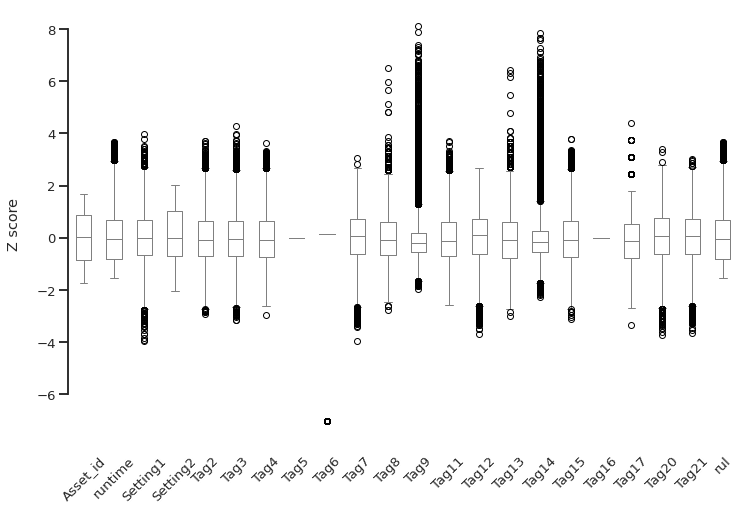

In [ ]:
#plt.figure(figsize=(8, 6)
df_train.apply(scale).plot.box(color='gray')
sns.despine(trim=True, bottom=True)
plt.tick_params(bottom=False)
plt.ylabel('Z score')
plt.xticks(rotation = 45)
plt.grid(False)

Observa-se a presença de ouliers na maioria das variáveis. Inicialmente os dados serão mantidos assim, a depender da performance dos modelos posso tratar os outliers.

Outro ponto é que três variáveis(Tag 5, Tag6 e Tag16) apresentam baixa variância. Por isso, elas também serão removidas.

In [ ]:
df_train = df_train.drop(columns=['Tag5', 'Tag6', 'Tag16'])
df_test = df_test.drop(columns=['Tag5', 'Tag6', 'Tag16'])

###Visualização de dados

Dropando variáveis altamente correlacionadas

In [ ]:
cor_matrix = df_train.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= 0.8)]
print(f'Colunas removidas: {to_drop}')
df_train = df_train.drop(columns=to_drop)
df_train.head()


['Tag11', 'Tag12', 'Tag13', 'Tag14']


,Asset_id,runtime,Setting1,Setting2,Tag2,Tag3,Tag4,Tag7,Tag8,Tag9,Tag15,Tag17,Tag20,Tag21,rul
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,8.4294,393,38.90,23.4044,187


In [ ]:
corr

,Asset_id,runtime,Setting1,Setting2,Tag2,Tag3,Tag4,Tag7,Tag8,Tag9,Tag15,Tag17,Tag20,Tag21,rul
Asset_id,1.000000,0.078753,-0.017895,-0.006197,0.014133,0.012621,0.026116,-0.032073,0.039929,-0.052053,0.022486,0.013513,-0.020589,-0.016465,0.078753
runtime,0.078753,1.000000,-0.004527,0.016132,0.549898,0.543947,0.624577,-0.595914,0.475977,0.443999,0.588676,0.566995,-0.583597,-0.585923,-0.736241
Setting1,-0.017895,-0.004527,1.000000,0.011660,0.009030,-0.005651,0.009544,-0.009437,-0.000427,-0.004279,0.007652,0.002599,-0.005713,-0.014559,-0.003198
Setting2,-0.006197,0.016132,0.011660,1.000000,0.007266,0.009068,0.014673,-0.016678,0.013285,-0.005425,0.014156,0.012280,-0.010554,-0.007846,-0.001948
Tag2,0.014133,0.549898,0.009030,0.007266,1.000000,0.602610,0.714949,-0.702136,0.662325,0.273764,0.675975,0.629886,-0.661841,-0.668050,-0.606484
Tag3,0.012621,0.543947,-0.005651,0.009068,0.602610,1.000000,0.678413,-0.664595,0.602481,0.322964,0.639921,0.600017,-0.625941,-0.633901,-0.584520
Tag4,0.026116,0.624577,0.009544,0.014673,0.714949,0.678413,1.000000,-0.793130,0.746852,0.297429,0.758459,0.703499,-0.748067,-0.745193,-0.678948
Tag7,-0.032073,-0.595914,-0.009437,-0.016678,-0.702136,-0.664595,-0.793130,1.000000,-0.767132,-0.217835,-0.747051,-0.692893,0.736163,0.737447,0.657223
Tag8,0.039929,0.475977,-0.000427,0.013285,0.662325,0.602481,0.746852,-0.767132,1.000000,-0.032091,0.700949,0.627785,-0.687030,-0.688840,-0.563968
Tag9,-0.052053,0.443999,-0.004279,-0.005425,0.273764,0.322964,0.297429,-0.217835,-0.032091,1.000000,0.293753,0.337110,-0.285280,-0.292795,-0.390102


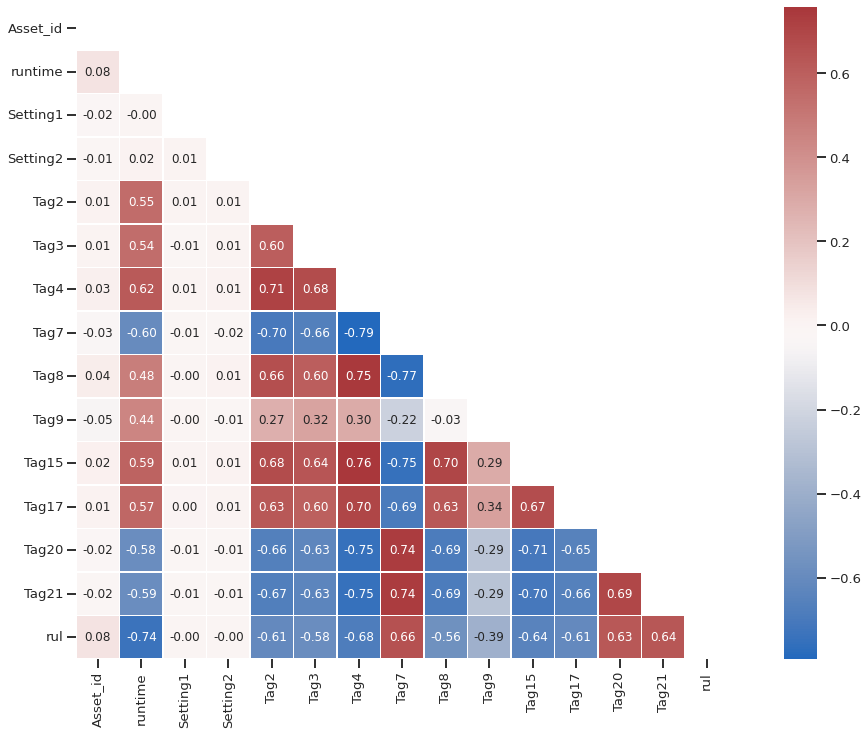

In [ ]:
corr = df_train.corr()
mask = np.triu(corr)

fig = plt.figure(figsize=(20,12))
#sns.heatmap(corr, cmap=cmap, annot=True, mask=mask, annot_kws={"fontsize":1.});
sns.heatmap(corr, cmap='vlag', square=True, mask=mask, linewidth=0.5, annot=True, annot_kws={'fontsize':'small'}, fmt='.2f');

Observa-se que a maioria das variáveis possuem correlação moderada/alta com o target. Destacando-se: runtime, Tag11, Tag4, Tag12 e Tag 7.

Nota-se também que três variáveis apresentam correlação com o alvo próxima de 0. Por isso, elas serão removidas.

In [ ]:
df_train = df_train.drop(columns=['Asset_id', 'Setting1', 'Setting2'])
df_test = df_test.drop(columns=['Asset_id', 'Setting1', 'Setting2'])

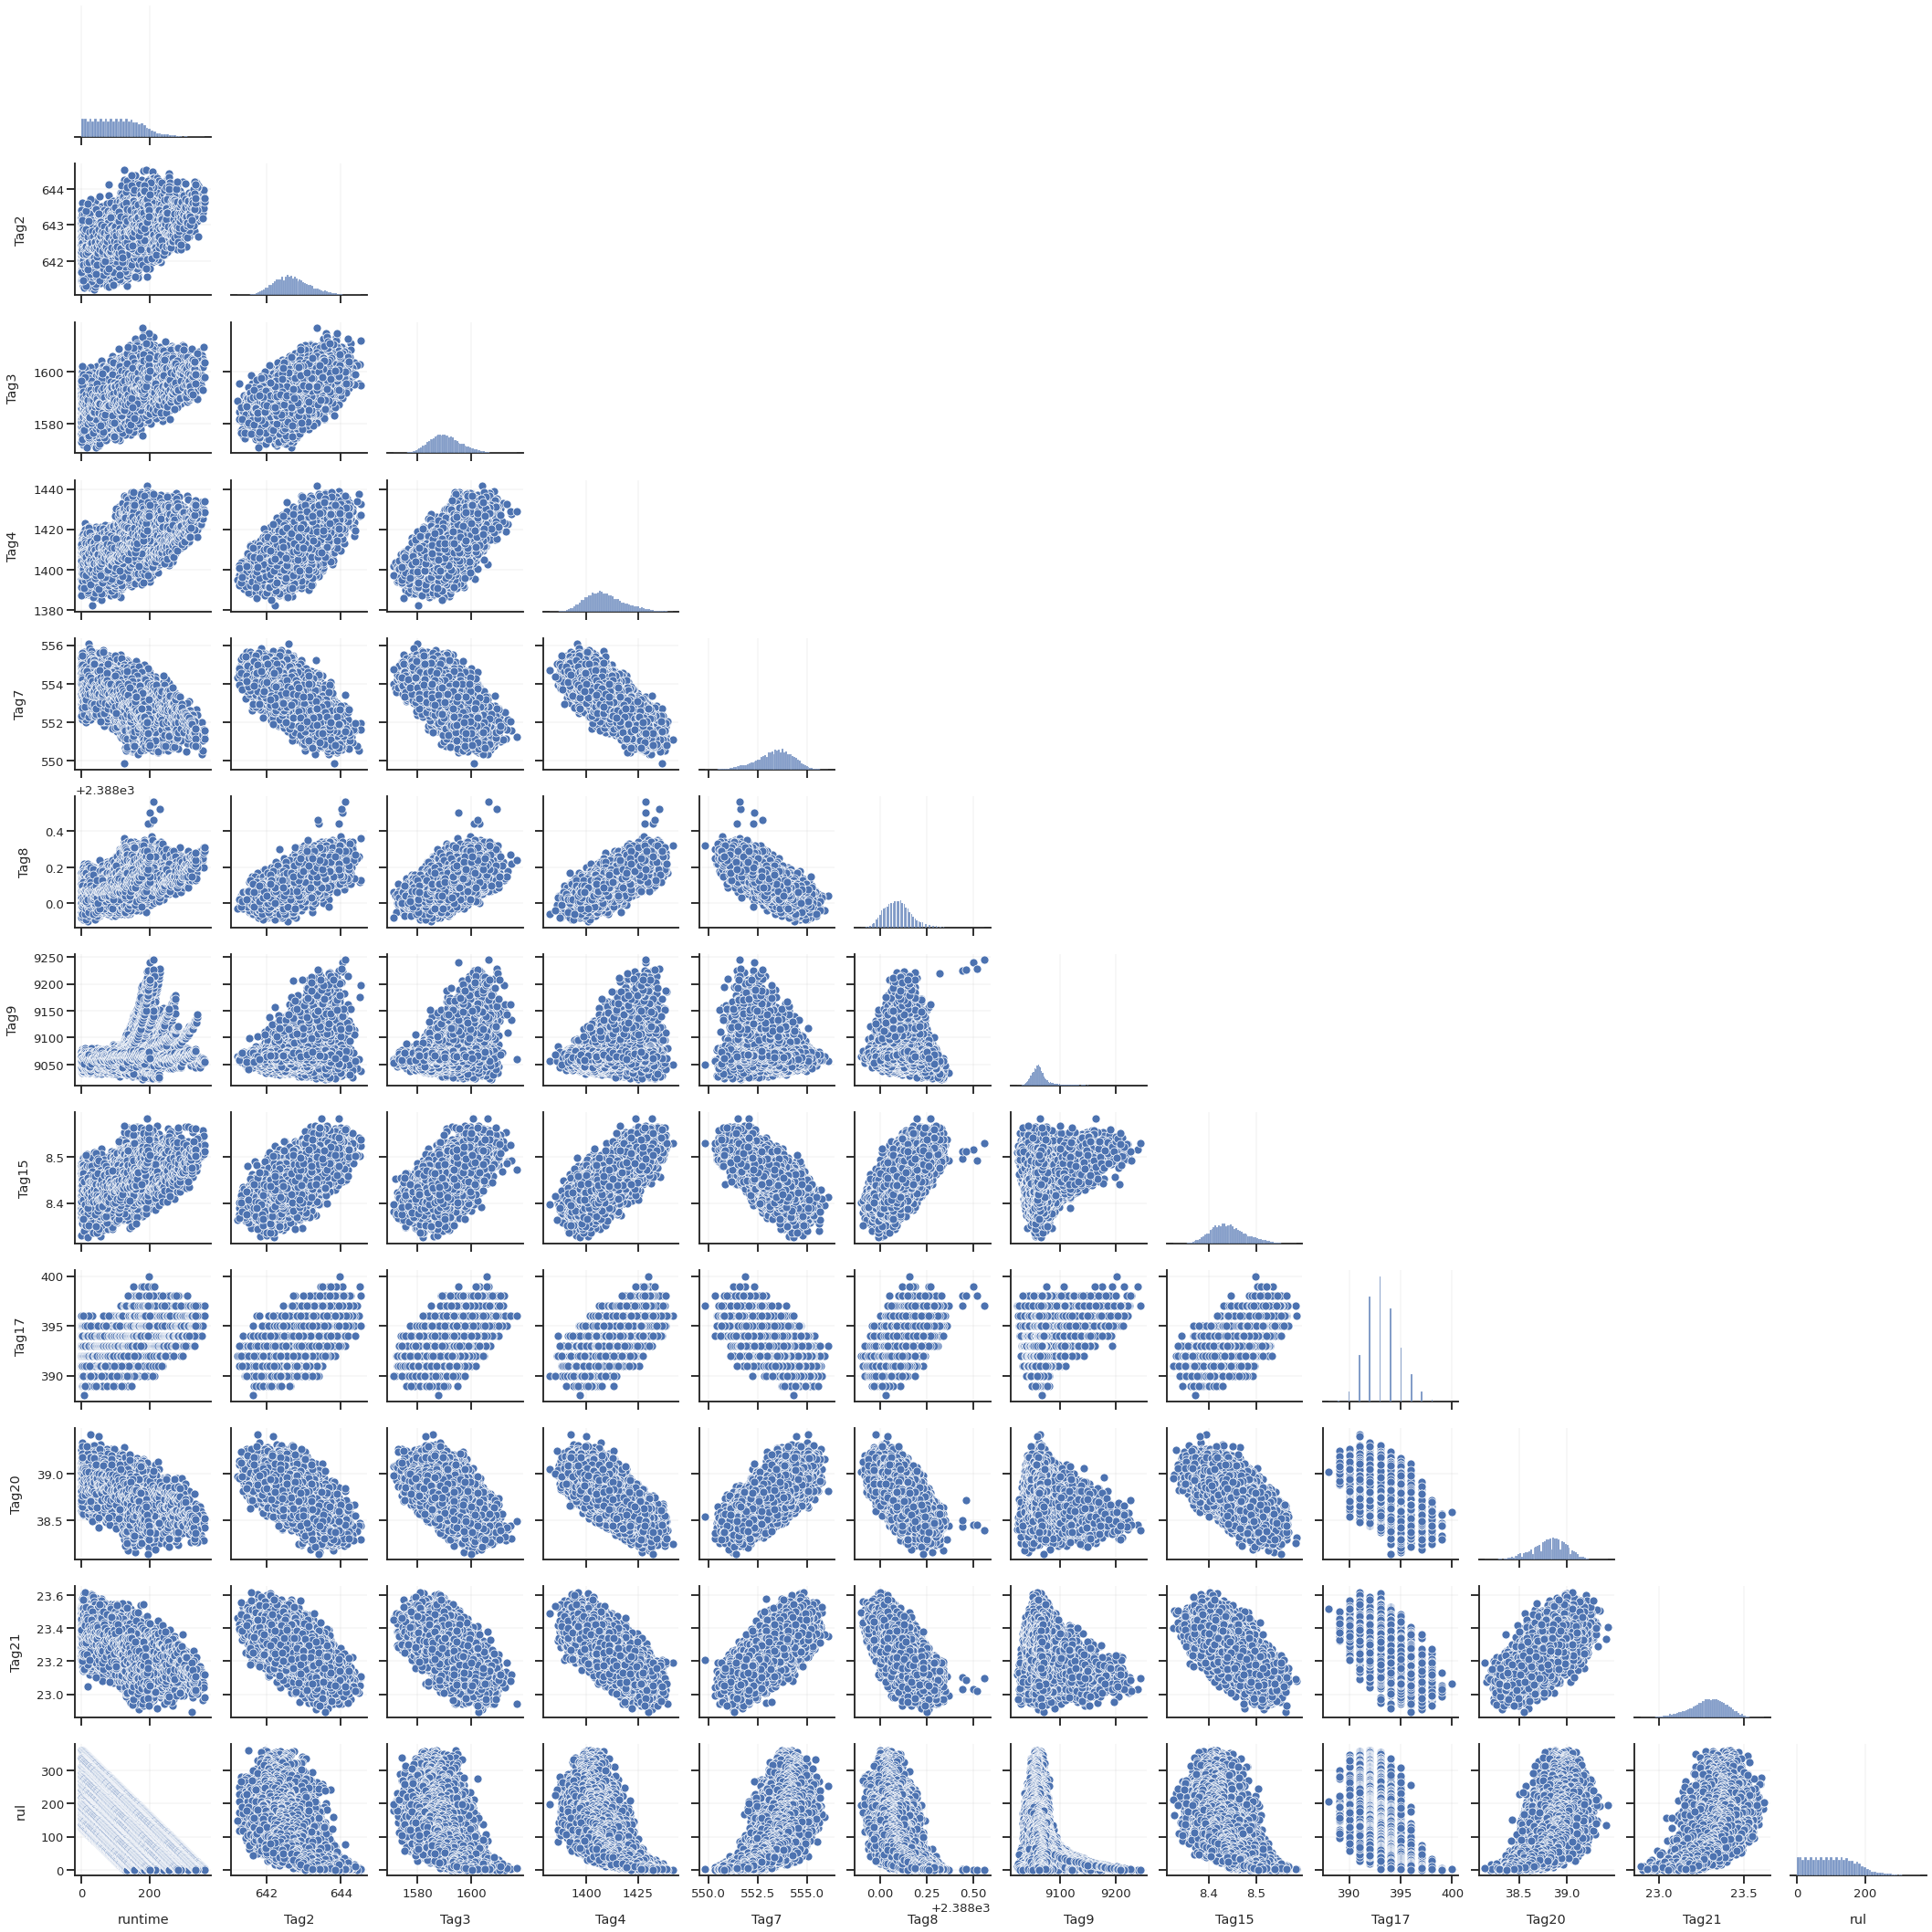

In [ ]:
sns.pairplot(df_train, corner=True)

##Modelling

###Divisão treino/teste

In [ ]:
X = df_train.drop(columns=['rul'])
y = df_train.rul

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

###Testando o melhor modelo default

Dummy

In [ ]:
dm = DummyRegressor().fit(X_train, y_train)
y_dm = dm.predict(X_test)
MSEdm = mean_squared_error(y_test, y_dm)

In [ ]:
print("MSE Dummy:", MSEdm)
print("RMSE Dummy:", np.sqrt(MSEdm))

MSE Dummy: 4699.338964898342
RMSE Dummy: 68.55172474050775


Lasso

In [ ]:
lasso = LassoCV(random_state=123).fit(X_train, y_train)
y_lasso = lasso.predict(X_test)
MSElasso = mean_squared_error(y_test, y_lasso)

In [ ]:
print("MSE Lasso:", MSElasso)
print("RMSE Lasso:", np.sqrt(MSElasso))

MSE Lasso: 1745.0012932280115
RMSE Lasso: 41.77321262756806


Random Forest

In [ ]:
rf = RandomForestRegressor(random_state=123).fit(X_train, y_train)
y_rf = rf.predict(X_test)
MSErf = mean_squared_error(y_test, y_rf)

In [ ]:
print("MSE RF:", MSErf)
print("RMSE RF:", np.sqrt(MSErf))

MSE RF: 1350.2786618366852
RMSE RF: 36.74613805336127


Gradient Boosting

In [ ]:
gb = GradientBoostingRegressor(random_state=123).fit(X_train, y_train)
y_gb = gb.predict(X_test)
MSEgb = mean_squared_error(y_test, y_gb)

In [ ]:
print("MSE GB:", MSEgb)
print("RMSE GB:", np.sqrt(MSEgb))

MSE GB: 1374.884392451736
RMSE GB: 37.07943355084778


De acordo a métrica de avaliação, o melhor modelo foi o Gradient Boosting Regressor.

Ele será retreinado com os dados de treino completos e utilizado para prever os dados de teste reais.

In [ ]:
df_test = df_test.drop(columns=to_drop)
X_test_final = df_test.drop(columns='rul')
y_test_final = df_test.rul

KeyError: ignored

In [ ]:
final_gb = GradientBoostingRegressor(random_state=123).fit(X, y)
y_gbf = final_gb.predict(X_test_final)
MSEgbf = mean_squared_error(y_test_final, y_gbf)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Tag11
- Tag12
- Tag13
- Tag14
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: ignored

In [ ]:
print("MSE GB final:", MSEgbf)
print("RMSE GB final:", np.sqrt(MSEgbf))

In [ ]:
final_gb.feature_importances_

Exportando os resultados

In [ ]:
asset_id = pd.DataFrame(data=df_test['Asset_id'], columns=['Asset_id'])
y_final = pd.DataFrame(data=y_gbf, columns=['rul'])
df_final = pd.concat([asset_id, y_final], axis=1)
df_final

In [ ]:
df_final.to_csv('df_test_final')